In [1]:
import numpy as np

In [2]:
import matplotlib.pyplot as plt

In [3]:
import pandas as pd

In [4]:
df = pd.read_csv("titanic/train.csv")

In [5]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [6]:
df.shape

(891, 12)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
df["Fare"][df.Sex == "male"].agg(["mean", "min", "max"])

mean     25.523893
min       0.000000
max     512.329200
Name: Fare, dtype: float64

In [10]:
df["Fare"][df.Sex == "female"].agg(["mean", "min", "max"]) # в среднем женский билет стоит дороже, чем мужской, следовательно среди женщин больше билетов среднего и высого класса

mean     44.479818
min       6.750000
max     512.329200
Name: Fare, dtype: float64

In [11]:
df["Sex"].value_counts() # количество мужчин и женщин

Sex
male      577
female    314
Name: count, dtype: int64

In [12]:
df[df.Sex == "female"].groupby("Pclass").size() # билеты, купленные женщинами, по классам

Pclass
1     94
2     76
3    144
dtype: int64

In [13]:
df[df.Sex == "male"].groupby("Pclass").size() #  билеты, купленные мужчинами, по классам

Pclass
1    122
2    108
3    347
dtype: int64

([<matplotlib.patches.Wedge at 0x1d68083bb10>,
 [Text(0.8661148756560177, 0.6781187375138377, '1 Class'),
  Text(-0.37278079721353613, 1.0349079559211247, '2 Class'),
  Text(-0.3444722080833052, -1.044671669883994, '3 class')],
 [Text(0.4724262958123733, 0.3698829477348205, '21.1%'),
  Text(-0.20333498029829242, 0.5644952486842498, '18.7%'),
  Text(-0.18789393168180282, -0.5698209108458148, '60.1%')])

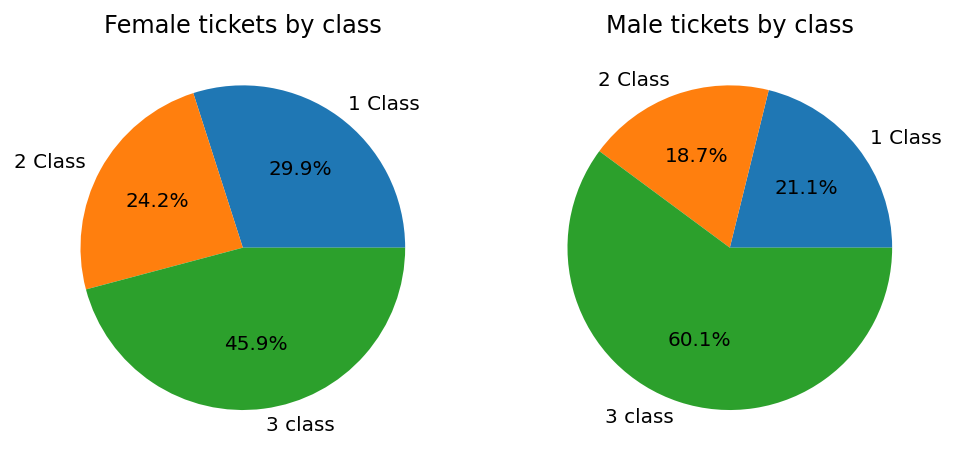

In [21]:
# диаграммы для каждого класса билетов, разделенные по признаку пола

labels = '1 Class', '2 Class', '3 class'
sizes_female = [len(df[(df.Sex == "female") & (df.Pclass == 1)]), len(df[(df.Sex == "female") & (df.Pclass == 2)]), len(df[(df.Sex == "female") & (df.Pclass == 3)])]
sizes_male = [len(df[(df.Sex == "male") & (df.Pclass == 1)]), len(df[(df.Sex == "male") & (df.Pclass == 2)]), len(df[(df.Sex == "male") & (df.Pclass == 3)])]

fig = plt.figure(figsize=(8,8),dpi=144)
ax = fig.add_subplot(121)

ax.set_title("Female tickets by class")
ax.pie(sizes_female, labels=labels, autopct='%1.1f%%')

ax = fig.add_subplot(122)
ax.set_title("Male tickets by class")
ax.pie(sizes_male, labels=labels, autopct='%1.1f%%')

In [15]:
'''
    Попробуем найти семьи, для этого надо найти людей с одиноковой фамилией,
    для фильтрации однофамильцев сделаем условие, что люди с одинаковой фамилией должны
    быть в одном классе и плыть в один город
'''

df['LastName'] = df['Name'].apply(lambda x: x.split(',')[0]) # отделяем фамилию от имени
#lastname_groups = df.groupby("LastName").size()
#print(lastname_groups[:75])


# ищем фамилии, который повторяются, а также проверяем поля Pclass и Embarked
families = df.groupby('LastName').filter(lambda group: len(group) > 1 and group['Pclass'].nunique() == 1 and group['Embarked'].nunique() == 1)


print("People with the same last name and fields 'Pclass' и 'Embarked':")
print(families[['LastName', 'Pclass', 'Embarked', 'Survived']])


# попытаемся выяснить, есть ли семьи, в которых выжили все члены семьи
print("Families where all members survived")
print(families[['Name', 'Pclass', 'Embarked']][families["Survived"] == 1]) # список семей, выживших полным составом
a = len(families[families["Survived"] == 1])
print(f"Number of families that survived: {a}") # список семей, выживших полным составом

People with the same last name and fields 'Pclass' и 'Embarked':
       LastName  Pclass Embarked  Survived
0        Braund       3        S         0
3      Futrelle       1        S         1
5         Moran       3        Q         0
7       Palsson       3        S         0
8       Johnson       3        S         1
..          ...     ...      ...       ...
876  Gustafsson       3        S         0
877     Petroff       3        S         0
885        Rice       3        Q         0
887      Graham       1        S         1
888    Johnston       3        S         0

[297 rows x 4 columns]
Families where all members survived
                                                  Name  Pclass Embarked
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)       1        S
8    Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)       3        S
9                  Nasser, Mrs. Nicholas (Adele Achem)       2        C
10                     Sandstrom, Miss. Marguerite Rut       3        S

In [16]:
df[df["LastName"] == "Petroff"] # проверка того что выше

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,LastName
101,102,0,3,"Petroff, Mr. Pastcho (""Pentcho"")",male,NaN,0,0,349215,7.8958,NaN,S,Petroff
877,878,0,3,"Petroff, Mr. Nedelio",male,19.0,0,0,349212,7.8958,NaN,S,Petroff


In [ ]:
# TODO круговая диаграмма по процентам выживших из разных городов
# разбить людей по возрастам и посмотреть процент выживших